In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [7]:
categ_col = df.select_dtypes(include=['object', 'category']).columns
num_cols = [col for col in df.columns if col not in categ_col]

In [8]:
print(categ_col)

Index(['date'], dtype='object')


In [9]:
print(num_cols)

['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for i in categ_col:
  df[i] = le.fit_transform(df[i])

In [11]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [12]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 24 kB/s 


In [13]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [15]:
models = {"XGBoost Regressor": XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Catboost": CatBoostRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression(),
          }

In [ ]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
  """
  fits and evaluates given machine learning models
  models: a dictionary of different scikit learn machine learning models
  X_train: Training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: testing labels
  """
  #setting up a random seed
  np.random.seed(42)

  #making a dictionary to keep model scores
  model_scores = {}

  #looping through models
  for name , model in models.items():
      #fitting the modelto the data
      model.fit(x_train, y_train)
      #evaluating the model and appending its score to model_scores
      model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [ ]:
%%time
scores = fit_and_score(models,
                       x_train=x_train,
                       x_test=x_test,
                       y_train=y_train,
                       y_test=y_test)
scores

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['T2', 'T6'])
T6_target= normalised_df['T6']

In [30]:
df['T6'] = df.T6.astype(int)

In [29]:
df['T2'] = df.T2.astype(int)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, 'T6_target',
test_size=0.3, random_state=1)


ValueError: ignored

In [25]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


NameError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

In [32]:
x = df.drop('T2', axis=1)
y = df['T6']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15788, 28), (15788,), (3947, 28), (3947,))

In [35]:
models = {"XGBoost Regressor": XGBRegressor(),
          "DecisionTree Regressor": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Catboost": CatBoostRegressor(),
          "gradientboosting": GradientBoostingRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(),
          "Ridge": Ridge(),
          "SVR": SVR(),
          "LinearRegression": LinearRegression(),
          }

In [45]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
  """
  fits and evaluates given machine learning models
  models: a dictionary of different scikit learn machine learning models
  X_train: Training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: testing labels
  """
  #setting up a random seed
  np.random.seed(42)

  #making a dictionary to keep model scores
  model_scores = {}

  #looping through models
  for name , model in models.items():
      #fitting the modelto the data
      model.fit(x_train, y_train)
      #evaluating the model and appending its score to model_scores
      model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [37]:
%%time
scores = fit_and_score(models,
                       x_train=x_train,
                       x_test=x_test,
                       y_train=y_train,
                       y_test=y_test)
scores

[23:06:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.063316
0:	learn: 5.6706055	total: 59.8ms	remaining: 59.8s
1:	learn: 5.3481823	total: 70ms	remaining: 34.9s
2:	learn: 5.0452361	total: 80.1ms	remaining: 26.6s
3:	learn: 4.7506519	total: 90.4ms	remaining: 22.5s
4:	learn: 4.4811323	total: 100ms	remaining: 19.9s
5:	learn: 4.2285421	total: 110ms	remaining: 18.3s
6:	learn: 3.9877621	total: 120ms	remaining: 17.1s
7:	learn: 3.7630645	total: 130ms	remaining: 16.2s
8:	learn: 3.5541480	total: 141ms	remaining: 15.5s
9:	learn: 3.3474774	total: 151ms	remaining: 15s
10:	learn: 3.1613001	total: 162ms	remaining: 14.6s
11:	learn: 2.9894332	total: 172ms	remaining: 14.2s
12:	learn: 2.8182976	total: 182ms	remaining: 13.8s
13:	learn: 2.6583802	total: 194ms	remaining: 13.6s
14:	learn: 2.5028324	total: 209ms	remaining: 13.7s
15:	learn: 2.3616696	total: 218ms	remaining: 13.4s
16:	learn: 2.2263312	total: 228ms	rem

{'XGBoost Regressor': 0.9999999924213653,
 'DecisionTree Regressor': 1.0,
 'Random Forest': 0.9999999885229404,
 'Catboost': 0.9999826109889851,
 'gradientboosting': 0.9999999966276248,
 'KNeighborsRegressor': 0.975796029039883,
 'Ridge': 0.9999999999094644,
 'SVR': 0.4123216852745073,
 'LinearRegression': 1.0}

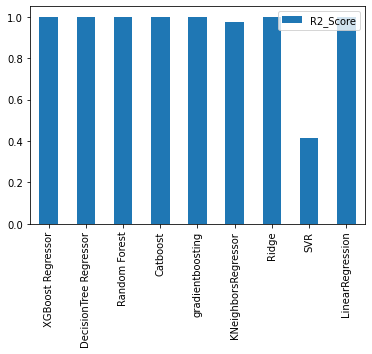

In [38]:
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar();

In [48]:
model_score(x_test, y_test)

NameError: ignored

In [39]:
y_preds = cbt_model.predict(x_test)
y_preds

NameError: ignored

In [41]:
mse = mean_squared_error(y_test, y_preds)
mse

NameError: ignored

In [ ]:
mae = mean_absolute_error(y_test, y_preds)
mae

In [49]:
models = {"Catboost": CatBoostRegressor(),
          "LinearRegression": LinearRegression(),
          }